In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# solving the initial value problem
# y' = 3 + 9t + y/2, y(0) = -40

def slope(t, y):
    sl = 3 + 9*t + y/2
    return(sl)

In [ ]:
# Setting up the grid
t0 = 0
y0 = -40
tf = 16
ts = (t0, tf)
n = 1000
dt = (tf-t0)/n

T = np.linspace(t0, tf, n+1)

In [ ]:
# Array to store of the y-values
ey = np.zeros(n+1)
ey[0] = y0

In [ ]:
# Euler's iteration
for i in range(n):
    ey[i+1] = ey[i] + slope(t0 + i*dt, ey[i])*dt

In [ ]:
# now the RK45 solver
sol = solve_ivp(slope, ts, (y0,), t_eval=T)

In [ ]:
# setting up the theoretical solution
Y = -42 - 18*T + 2*np.exp(T/2)

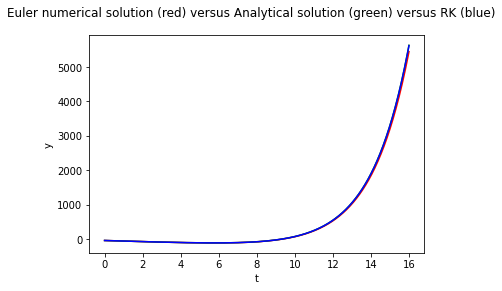

In [ ]:
plt.plot(T, ey, 'r', T, Y, 'g', T, sol.y[0], 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.suptitle('Euler numerical solution (red) versus Analytical solution (green) versus RK (blue)')
plt.show()

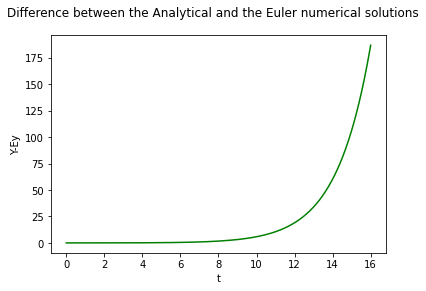

In [ ]:
# Lets also plot the discrepancies
plt.plot(T, Y-ey, 'g')
plt.xlabel('t')
plt.ylabel('Y-Ey')
plt.suptitle('Difference between the Analytical and the Euler numerical solutions')
plt.show()

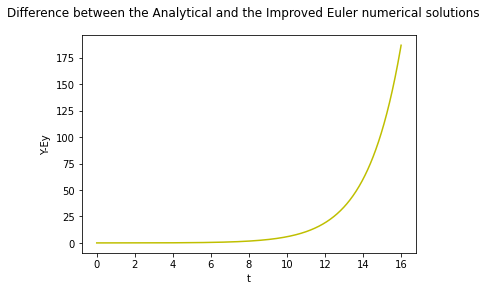

In [ ]:
# Lets also plot the discrepancies
plt.plot(T, Y-ey, 'y')
plt.xlabel('t')
plt.ylabel('Y-Ey')
plt.suptitle('Difference between the Analytical and the Improved Euler numerical solutions')
plt.show()

1. Implement the improved Euler method for the initial value problem from above. Insert a graph of the difference between the analytical solution and the improved Euler approxamation.

2. scipy.integrate.solve_ivp has an option to use and implementation of the RK method of order 8. Plot the difference between the RK8 approximation and the exact solution.

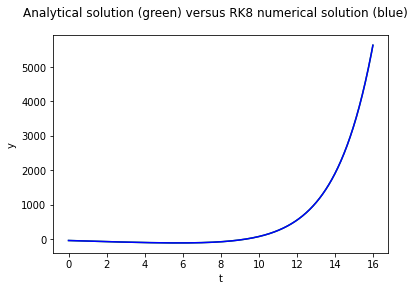

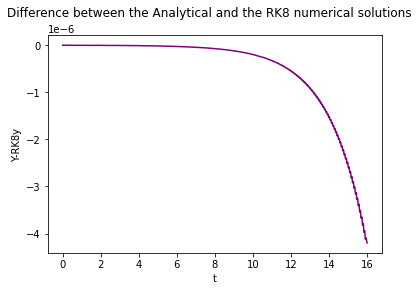

In [ ]:
# using RK8 method
sol_rk8 = solve_ivp(slope, ts, (y0,), method='RK45', t_eval=T, rtol=1e-10, atol=1e-12)

# plotting the solution and the discrepancies
plt.plot(T, Y, 'g', T, sol_rk8.y[0], 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.suptitle('Analytical solution (green) versus RK8 numerical solution (blue)')
plt.show()

plt.plot(T, Y-sol_rk8.y[0], 'purple')
plt.xlabel('t')
plt.ylabel('Y-RK8y')
plt.suptitle('Difference between the Analytical and the RK8 numerical solutions')
plt.show()